In [2]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import sklearn

In [6]:
df_train = pd.read_csv('/Users/yangzhang/Documents/文稿 - YangZhang的MacBook Pro/Data Science/Machine Learning/sansan-001/train.csv')

In [7]:
df_train.head()

,filename,left,top,right,bottom,company_name,full_name,position_name,address,phone_number,fax,mobile,email,url
0,2842.png,491,455,796,485,0,0,0,0,0,0,1,0,0
1,182.png,24,858,311,886,0,0,0,0,0,0,1,0,0
2,95.png,320,498,865,521,0,0,0,0,0,1,1,0,0
3,2491.png,65,39,497,118,1,0,0,0,0,0,0,0,0
4,3301.png,271,83,333,463,0,1,1,0,0,0,0,0,0


In [8]:
df_train.shape

(25357, 14)

In [9]:
row = df_train.iloc[0,:]
row

filename         2842.png
left                  491
top                   455
right                 796
bottom                485
company_name            0
full_name               0
position_name           0
address                 0
phone_number            0
fax                     0
mobile                  1
email                   0
url                     0
Name: 0, dtype: object

In [20]:
DIR_IMAGES = '/Users/yangzhang/Documents/文稿 - YangZhang的MacBook Pro/Data Science/Machine Learning/sansan-001/images'
img = Image.open(os.path.join(DIR_IMAGES, row.filename))
img = img.crop((row.left, row.top, row.right, row.bottom))
img

In [21]:
df_test = pd.read_csv('/Users/yangzhang/Documents/文稿 - YangZhang的MacBook Pro/Data Science/Machine Learning/sansan-001/test.csv')

In [22]:
df_test.head()

,filename,left,top,right,bottom
0,1942.png,66,359,361,386
1,1128.png,58,373,519,422
2,2719.png,62,289,297,314
3,641.png,58,668,416,747
4,2529.png,42,212,303,244


In [23]:
df_test.shape


(8918, 5)

In [24]:
df_train=df_train.sample(500,random_state=0)
df_test=df_test.sample(100,random_state=0)

In [25]:
img

In [26]:
img = img.convert('L')

In [27]:
img

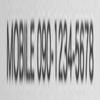

In [28]:
IMG_SIZE = 100
img = img.resize((IMG_SIZE,IMG_SIZE),resample = Image.BICUBIC)
img

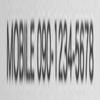

In [30]:
IMG_SIZE = 100
img = img.resize((IMG_SIZE, IMG_SIZE),resample = Image.BICUBIC)
img

In [32]:
x = np.asarray(img,dtype = np.float)
x.shape

(100, 100)

In [33]:
x

array([[ 204.,  203.,  203., ...,  222.,  223.,  223.],
       [ 204.,  203.,  203., ...,  222.,  223.,  223.],
       [ 204.,  203.,  203., ...,  222.,  223.,  223.],
       ..., 
       [ 204.,  204.,  205., ...,  223.,  223.,  224.],
       [ 204.,  204.,  205., ...,  223.,  223.,  224.],
       [ 204.,  204.,  205., ...,  223.,  223.,  224.]])

In [34]:
x = x.flatten()
x

array([ 204.,  203.,  203., ...,  223.,  223.,  224.])

In [36]:
X_train = []
for i, row in df_train.iterrows():
    img = Image.open(os.path.join(DIR_IMAGES, row.filename))
    img = img.crop((row.left, row.top, row.right, row.bottom))
    img = img.convert('L')
    img = img.resize((IMG_SIZE,IMG_SIZE),resample = Image.BICUBIC)
    
    x = np.asarray(img,dtype = np.float)
    x = x.flatten()
    X_train.append(x)
X_train = np.array(X_train)

In [37]:
X_test = []
for i, row in df_test.iterrows():
    img = Image.open(os.path.join(DIR_IMAGES, row.filename))
    img = img.crop((row.left, row.top, row.right, row.bottom))
    img = img.convert('L')
    img = img.resize((IMG_SIZE,IMG_SIZE),resample=Image.BICUBIC)
    
    x = np.asarray(img, dtype=np.float)
    x = x.flatten()
    X_test.append(x)
X_test = np.array(X_test)

In [39]:
columns = ['company_name','full_name','position_name','address','phone_number','fax','mobile','email','url']
Y_train = df_train[columns].values

In [41]:
from sklearn.model_selection import train_test_split
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train,Y_train,train_size=0.8, random_state=0)


In [43]:
print (X_dev.shape, Y_dev.shape)
print (X_val.shape, Y_val.shape)

(400, 10000) (400, 9)
(100, 10000) (100, 9)


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_dev)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
X_dev_scaled = scaler.transform(X_dev)

In [46]:
X_dev_scaled.mean(axis=0)

array([ -3.16413562e-17,  -3.16413562e-17,   3.14193116e-16, ...,
        -1.51545443e-16,  -3.47777362e-16,   1.02695630e-17])

In [47]:
X_dev_scaled.var(axis=0)

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [48]:
from sklearn.decomposition import PCA
decomposer = PCA(n_components=10, random_state=0)
decomposer.fit(X_dev_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
X_dev_pca = decomposer.transform(X_dev_scaled)

In [49]:
X_dev_pca = decomposer.transform(X_dev_scaled)

In [51]:
print (X_dev_pca.shape)

(400, 10)


In [53]:
X_val_scaled = scaler.transform(X_val)
X_val_pca = decomposer.transform(X_val_scaled)

In [59]:
from sklearn.linear_model import LogisticRegression

classifiers = []
for j in range(Y_dev.shape[1]):
    y = Y_dev[:,j]
    classifier = LogisticRegression(penalty = 'l2', C = 0.01)
    classifier.fit(X_dev_pca,y)
    classifiers.append(classifier)

In [61]:
Y_val_pred = np.zeros(Y_val.shape)
for j in range(Y_dev.shape[1]):
    classifier = classifiers[j]
    y = classifier.predict_proba(X_val_pca)[:,1]
    Y_val_pred[:,j] = y

In [62]:
Y_val_pred.shape


(100, 9)

In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_val,Y_val_pred,average='macro')

0.81590230361126037

In [64]:
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(LogisticRegression(penalty='l2',C=0.01))
classifier.fit(X_dev_pca,Y_dev)
Y_val_pred = classifier.predict_proba(X_val_pca)

In [65]:
roc_auc_score(Y_val,Y_val_pred,average='macro')

0.81590230361126037

In [66]:
from sklearn.pipeline import Pipeline

steps = [('scaler',StandardScaler()),('decomposer',PCA(10,random_state=0)),
        ('classifier',OneVsRestClassifier(LogisticRegression(penalty='l2')))]
pipeline = Pipeline(steps)


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

params = {'classifier__estimator__C':[0.01,0.1,1.0,10.,100.]}
scorer = make_scorer(roc_auc_score,average='macro',needs_proba=True)
predictor = GridSearchCV(pipeline,params,cv=5, scoring=scorer)

In [70]:
predictor.fit(X_dev,Y_dev)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decomposer', PCA(copy=True, iterated_power='auto', n_components=10, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, d...=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__estimator__C': [0.01, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro),
       verbose=0)

In [71]:
predictor.best_params_

{'classifier__estimator__C': 10.0}

In [72]:
Y_val_pred = predictor.predict_proba(X_val)
roc_auc_score(Y_val,Y_val_pred,average='macro')

0.82581633343114969

In [73]:
param = {'classifier__estimator__C': [0.01,0.1,1.0,10.,100.],
        'decomposer__n_components':[10,20,50]}

predictor = GridSearchCV(pipeline, params,cv=5,scoring=scorer)
predictor.fit(X_dev,Y_dev)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decomposer', PCA(copy=True, iterated_power='auto', n_components=10, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, d...=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__estimator__C': [0.01, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(roc_auc_score, needs_proba=True, average=macro),
       verbose=0)

In [74]:
predictor.best_params_

{'classifier__estimator__C': 10.0}

In [75]:
Y_val_pred = predictor.predict_proba(X_val)
roc_auc_score(Y_val,Y_val_pred,average='macro')

0.82581633343114969

In [76]:
final_predictor = predictor.best_estimator_
final_predictor.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decomposer', PCA(copy=True, iterated_power='auto', n_components=10, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', OneVsRestClassifier(estimator=LogisticRegression(C=10.0, class_weight=None, ...=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))])

In [77]:
Y_test_pred = final_predictor.predict_proba(X_test)
np.savetxt('submission.dat',Y_test_pred,fmt='%.6f')